In [30]:
import understand
from understand import *
from matplotlib import pyplot as plt


In [34]:
from importlib import reload
reload(understand)
from understand import *

In [3]:
net = start_2h2_net(2)

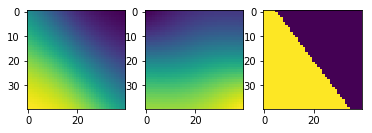

In [6]:

r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = net(torch.FloatTensor([x1,x2])).detach().numpy()
        

plt.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow(res[:,:,0])
plt.subplot(1,3,2)
plt.imshow(res[:,:,1])
plt.subplot(1,3,3)
plt.imshow(res[:,:,1] < res[:,:,0])

In [19]:
net5 = start_2h2_net(5)

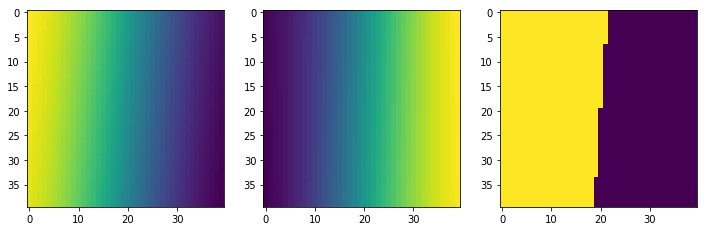

In [18]:

r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = net5(torch.FloatTensor([x1,x2])).detach().numpy()
        

plt.subplots(1,3,figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(res[:,:,0])
plt.subplot(1,3,2)
plt.imshow(res[:,:,1])
plt.subplot(1,3,3)
plt.imshow(res[:,:,1] < res[:,:,0])

In [22]:
net5.fc1.out_features

5

In [25]:
net5.fc1.weight.detach()

tensor([[-0.4536,  0.0798],
        [-0.4308,  0.3965],
        [-0.5652,  0.4592],
        [ 0.5069,  0.9146],
        [-0.0346,  0.0718]])

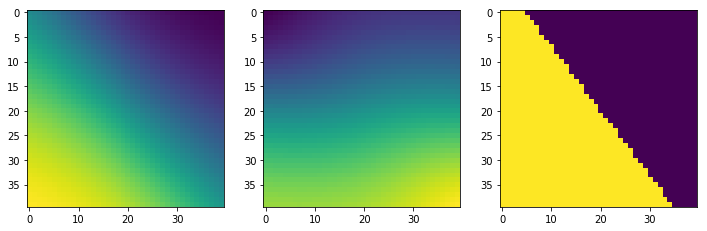

In [35]:
cnet = copy_net(net)

r = np.arange(-1,1,0.05)
res = np.zeros((len(r), len(r),2), np.double)
for i,x1 in enumerate(r):
    for j,x2 in enumerate(r):
        res[i,j,:] = cnet(torch.FloatTensor([x1,x2])).detach().numpy()
        

plt.subplots(1,3,figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(res[:,:,0])
plt.subplot(1,3,2)
plt.imshow(res[:,:,1])
plt.subplot(1,3,3)
plt.imshow(res[:,:,1] < res[:,:,0])

In [43]:
print(net.fc2.bias.detach())
print(cnet.fc2.bias.detach())


tensor([0., -0.])
tensor([5., 5.])


In [42]:
cnet.fc2.bias = Parameter(torch.FloatTensor([5,5]))